In [36]:
import garpar as gp
import itertools as it
import pandas as pd
import numpy as np
import joblib as jb
import tqdm.notebook
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns

## Parámetros de la Levy desde una muestra aleatoria

In [4]:
x = scipy.stats.levy_stable.rvs(alpha=2.0, beta=-0.0126, loc=0.0005, scale=0.005, size=100)
alpha1, beta1, loc1, scale1 = scipy.stats.levy_stable.fit(x)
alpha1, beta1, loc1, scale1


(1.999998090004343,
 0.2782352746838811,
 0.00030591558146816683,
 0.004307502165545039)

## Parámetros de Levy desde un año de Mercado Valores Argentino 

In [5]:
merval21 = gp.datasets.load_MERVAL(
    first="01-02-2021", last = "12-31-2021")
merval21 = merval21.as_returns()
merval21

Stocks,ALUA,BBAR,BYMA,CEPU,COME,CRES,CVH,EDN,GGAL,HARG,...,MOLA,MOLI,MORI,OEST,PATA,POLL,RIGO,SAMI,SEMI,TGLT
Days,,,,,,,,,,,,,,,,,,,,,
2021-01-05,0.056995,-0.014122,-0.003331,0.039242,0.004132,0.027451,0.020047,-0.012456,0.003245,0.016598,...,0.028148,0.006873,0.046358,-0.001789,0.021505,0.076503,0.000000,0.000000,-0.010889,-0.006061
2021-01-06,0.035294,-0.012325,0.008354,-0.026042,0.008230,0.013740,0.035838,-0.007207,-0.004852,0.016327,...,0.011527,-0.010239,-0.006329,-0.017921,-0.026316,0.000000,0.015385,0.008475,0.023853,0.006098
2021-01-07,0.005682,-0.015514,-0.000829,-0.005348,-0.004082,0.038404,0.001116,-0.014519,0.006908,-0.006024,...,0.001425,-0.006897,0.054140,0.000000,0.000000,0.000000,0.030303,0.000000,0.109319,-0.012121
2021-01-08,0.005650,-0.002398,-0.000829,-0.013441,-0.012295,-0.015228,-0.125975,-0.009208,-0.010089,-0.004040,...,-0.001422,0.005787,-0.012085,-0.023723,-0.005405,0.000000,-0.011029,0.008403,-0.046850,-0.053170
2021-01-11,0.007491,-0.050137,-0.004149,-0.016349,-0.004149,0.002946,-0.019133,-0.040892,-0.019568,-0.012170,...,-0.027066,-0.016110,-0.024465,-0.009346,0.000000,-0.005076,-0.011152,0.008333,0.033898,0.010799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.024202,0.020322,0.031205,0.029366,0.001681,0.000996,0.021193,0.024510,0.003778,0.004280,...,0.016570,0.012295,-0.024922,0.048493,0.056319,0.000000,-0.006579,-0.001786,0.005025,0.008021
2021-12-27,-0.008593,0.019689,-0.017691,-0.010511,0.028523,-0.056716,-0.039969,0.029665,0.004266,-0.036932,...,0.029956,0.000000,0.012780,0.018750,-0.016905,-0.024299,0.000000,0.016100,0.000000,-0.013263
2021-12-28,-0.050921,-0.049394,-0.032227,-0.042489,0.001631,0.007911,-0.013611,-0.036245,-0.034733,-0.022124,...,0.028229,0.004049,0.000000,-0.019632,-0.010582,-0.007663,0.000000,-0.019366,0.001667,0.008065


In [6]:
y21 = merval21.mean(axis = 0, skipna = True)
y21

Stocks
ALUA     0.003034
BBAR     0.002111
BYMA     0.002487
CEPU     0.002874
COME     0.004394
CRES     0.002372
CVH      0.001886
EDN      0.003411
GGAL     0.002302
HARG     0.001710
MIRG     0.003881
PAMP     0.003631
SUPV     0.001665
TECO2    0.000576
TGNO4    0.003871
TGSU2    0.001023
TRAN     0.002961
TXAR     0.004134
YPFD     0.001129
AGRO     0.003768
AUSO     0.002325
BHIP    -0.000061
BOLT     0.000204
BPAT     0.000955
CADO     0.001365
CELU     0.000092
CGPA2    0.003669
DGCU2    0.003301
DYCA     0.002574
FERR     0.001701
FIPL     0.003082
GARO     0.004311
GBAN     0.003884
GCLA     0.005292
GRIM     0.005866
HAVA     0.001192
INVJ     0.000855
IRCP    -0.000682
IRSA     0.001648
LEDE     0.003289
LONG     0.001845
METR     0.003418
MOLA     0.002690
MOLI     0.001669
MORI     0.000382
OEST     0.001820
PATA     0.000346
POLL     0.005035
RIGO     0.000950
SAMI     0.001134
SEMI     0.000623
TGLT    -0.000923
dtype: float64

In [7]:
y21 = merval21.mean(axis = 0, skipna = True) 
alpha1, beta1, loc1, scale1 = scipy.stats.levy_stable.fit(y21)
alpha1, beta1, loc1, scale1

(2.0, 1.0, 0.0022513892259879527, 0.001210912700436551)

In [8]:
# definimos los sectores 
come = ["AUSO", "BOLT", "DYCA","GCLA", "IRCP", "IRSA", "OEST", "PATA", "POLL","TECO2","CVH"] 
moa = ["CELU", "GRIM", "HAVA", "LEDE", "MOLA", "MOLI", "MORI", "SAMI", "SEMI"] #"INTR"
moi = ["AGRO", "ALUA",  "FERR", "LONG", "RIGO", "HARG", "FIPL"] # "ROSE", "LOMA", "CAPU","MIRG","TXAR "
agro = ["CADO", "GARO", "INVJ","CRES"] #"ESME"
ene = ["CEPU", "CGPA2", "DGCU2", "GBAN", "METR", "TGNO4", "TGSU2", "YPFD", "PAMP","TRAN","COME","EDN","GBAN" ]  #"CARC",
fin = ["BHIP", "BPAT",  "BYMA", "GGAL", "SUPV", "BBAR"] #"BMA", "VALO", "BRIO","BRIO6",

In [9]:
y21scome = merval21[come].mean(axis = 1, skipna = True) 
alpha_come, beta_come, loc_come, scale_come = scipy.stats.levy_stable.fit(y21scome)
alpha_come, beta_come, loc_come, scale_come 

(1.8190316218403773,
 0.4503142299590916,
 0.0021742929768565605,
 0.00834763566037715)

In [10]:
ktestcom = scipy.stats.ks_1samp(x=y21scome, cdf=scipy.stats.levy_stable.cdf, args=(alpha_come, beta_come, loc_come, scale_come ))
ktestcom

KstestResult(statistic=0.025461714825871007, pvalue=0.9967036546261379, statistic_location=0.010164345043233804, statistic_sign=1)

In [11]:
y21smoa = merval21[moa].mean(axis = 1, skipna = True) 
alphamoa, betamoa, locmoa, scalemoa = scipy.stats.levy_stable.fit(y21smoa)
alphamoa, betamoa, locmoa, scalemoa

(1.9999999999999991,
 -0.9999999999999998,
 0.0021527853033436115,
 0.007323718974539857)

In [12]:
ktestmoa = scipy.stats.ks_1samp(x=y21smoa, cdf=scipy.stats.levy_stable.cdf, args=(alphamoa, betamoa, locmoa, scalemoa))
ktestmoa

KstestResult(statistic=0.052755722594221455, pvalue=0.49962670806675147, statistic_location=0.010466055474004933, statistic_sign=1)

In [13]:
y21smoi = merval21[moi].mean(axis = 1, skipna = True) 
alphamoi, betamoi, locmoi, scalemoi = scipy.stats.levy_stable.fit(y21smoi)
alphamoi, betamoi, locmoi, scalemoi

(2.0, 1.0, 0.002861928175619074, 0.00888794710133814)

In [14]:
ktestmoi=scipy.stats.ks_1samp(x=y21smoi, cdf=scipy.stats.levy_stable.cdf, args=(alphamoi, betamoi, locmoi, scalemoi))
ktestmoi

KstestResult(statistic=0.03591666575291125, pvalue=0.9050647533708039, statistic_location=-0.006053012350894235, statistic_sign=1)

In [15]:
y21sagro = merval21[agro].mean(axis = 1, skipna = True) 
alphaagro, betaagro, locagro, scaleagro = scipy.stats.levy_stable.fit(y21sagro)
alphaagro, betaagro, locagro, scaleagro

(1.7918750041895795,
 0.23881535080290872,
 0.002009024615225637,
 0.009778580052196851)

In [16]:
ktestagro =scipy.stats.ks_1samp(x=y21sagro, cdf=scipy.stats.levy_stable.cdf, args=(alphaagro, betaagro, locagro, scaleagro))
ktestagro 

KstestResult(statistic=0.039353973656518826, pvalue=0.8367294853450916, statistic_location=0.0020767034590011, statistic_sign=-1)

In [17]:
y21sene = merval21[ene].mean(axis = 1, skipna = True) 
alphaene, betaene, locene, scaleene = scipy.stats.levy_stable.fit(y21sene)
alphaene, betaene, locene, scaleene

(1.7421799494474097,
 0.4759121392451602,
 0.0035093258371752126,
 0.011599771620047423)

In [18]:
ktestene= scipy.stats.ks_1samp(x=y21sene, cdf=scipy.stats.levy_stable.cdf, args=(alphaene, betaene, locene, scaleene))
ktestene

KstestResult(statistic=0.03572499502454479, pvalue=0.9083627613731279, statistic_location=-0.010949555441387785, statistic_sign=-1)

In [19]:
y21sfin = merval21[fin].mean(axis = 1, skipna = True) 
alphafin, betafin, locfin, scalefin = scipy.stats.levy_stable.fit(y21sfin)
alphafin, betafin, locfin, scalefin

(1.8630914086054906,
 0.3745869387265307,
 0.0017691490461231897,
 0.012737154151075864)

In [25]:
ktestfin=scipy.stats.ks_1samp(x=y21sfin, cdf=scipy.stats.levy_stable.cdf, args=(alphafin, betafin, locfin, scalefin))
ktestfin

KstestResult(statistic=0.04049794063373313, pvalue=0.8107162618149142, statistic_location=-0.0035419046569829526, statistic_sign=1)

In [20]:
y21s = merval21.mean(axis = 1, skipna = True) 
alphat, betat, loct, scalet = scipy.stats.levy_stable.fit(y21s)
alphat, betat, loct, scalet

(1.8128170393712963,
 0.3392396471308702,
 0.002412045077898315,
 0.007927153418948544)

In [21]:
ktestt= scipy.stats.ks_1samp(x=y21s, cdf=scipy.stats.levy_stable.cdf, args=(alphat, betat, loct, scalet))
ktestt

KstestResult(statistic=0.03837006964829409, pvalue=0.8579258105755009, statistic_location=-0.002157593522697817, statistic_sign=1)

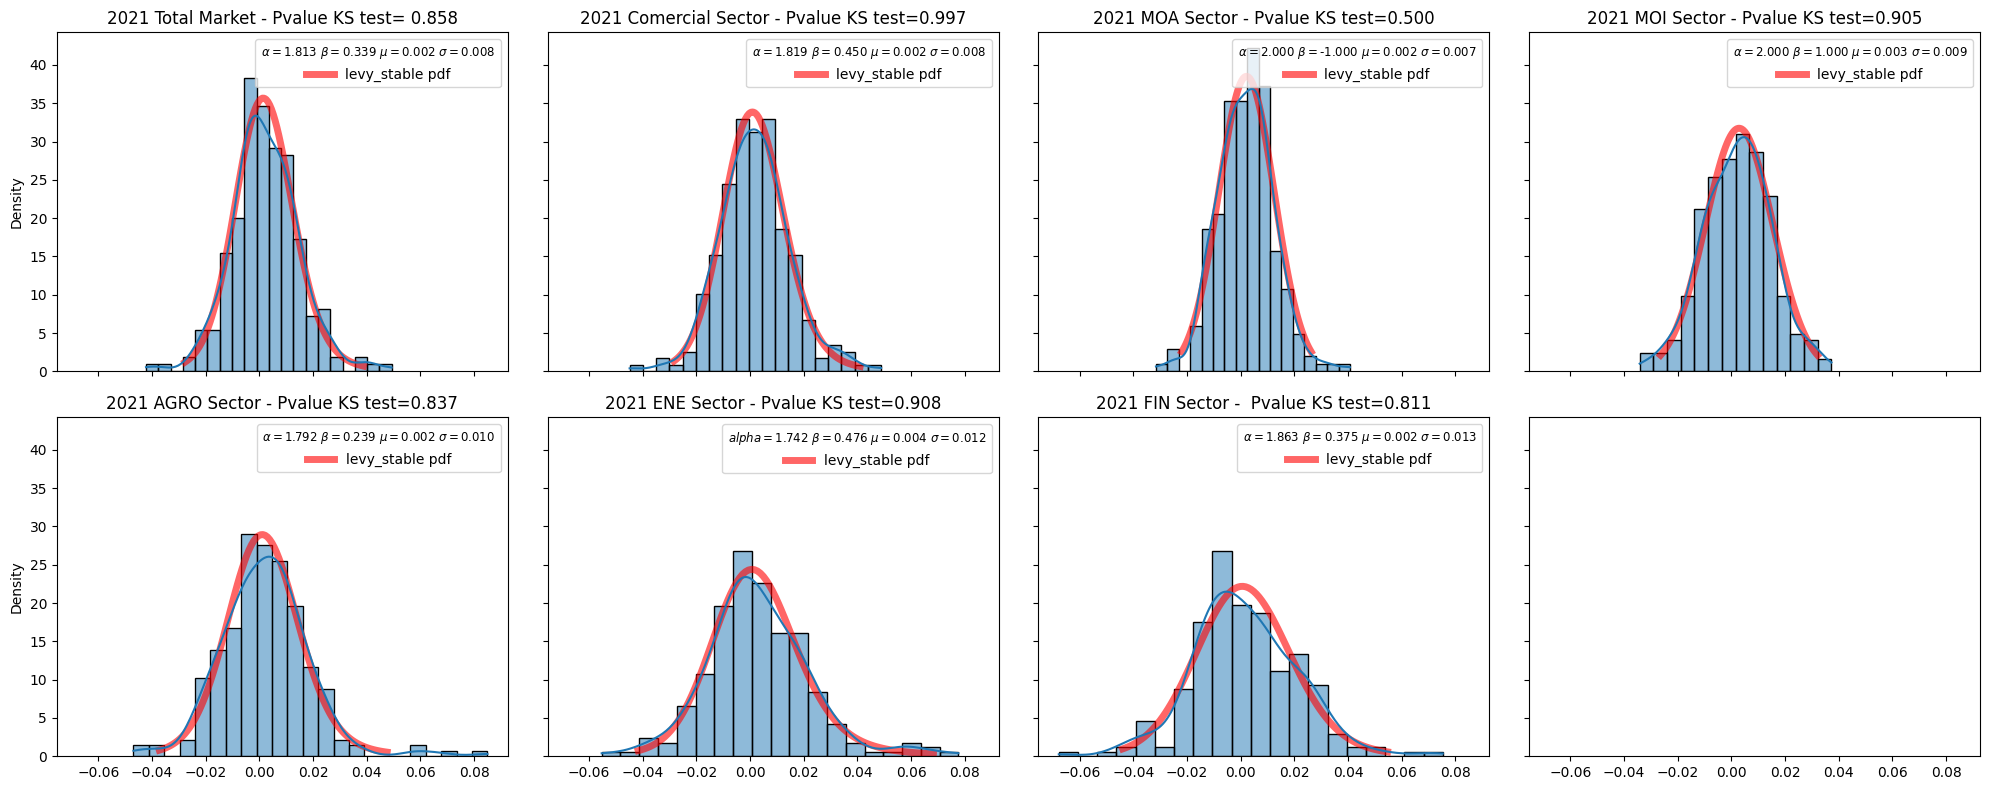

In [26]:
fig, ax = plt.subplots(2, 4, sharey=True, sharex=True)
fig.set_size_inches(20, 8)
#todo
alpha, beta, loc, scale = alphat, betat, loct, scalet
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,0].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,0],data=y21s,stat = "density",kde=True)
ax[0,0].set_title(f"2021 Total Market - Pvalue KS test= {ktestt.pvalue:.3f}")
ax[0,0].legend(title=fr"$\alpha=${alphat:.3f} $\beta=${betat:.3f} $\mu=${loct:.3f} $\sigma=${scalet:.3f}", title_fontsize = "8.5")

#come
alpha, beta, loc, scale = alpha_come, beta_come, loc_come, scale_come 
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,1].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,1],data=y21scome, stat = "density",kde=True)
ax[0,1].set_title(f"2021 Comercial Sector - Pvalue KS test={ktestcom.pvalue:.3f}")
ax[0,1].legend(title=fr"$\alpha=${alpha_come:.3f} $\beta=${beta_come:.3f} $\mu=${loc_come:.3f} $\sigma=${scale_come:.3f}", title_fontsize = "8.5")

#moa
alpha, beta, loc, scale = alphamoa, betamoa, locmoa, scalemoa
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,2].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,2],data=y21smoa, stat = "density",kde=True)
ax[0,2].set_title(f"2021 MOA Sector - Pvalue KS test={ktestmoa.pvalue:.3f}")
ax[0,2].legend(title=fr"$\alpha=${alphamoa:.3f} $\beta=${betamoa:.3f} $\mu=${locmoa:.3f} $\sigma=${scalemoa:.3f}", title_fontsize = "8.5")

#moi
alpha, beta, loc, scale = alphamoi, betamoi, locmoi, scalemoi
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,3].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,3],data=y21smoi, stat = "density",kde=True)
ax[0,3].set_title(f"2021 MOI Sector - Pvalue KS test={ktestmoi.pvalue:.3f}" )
ax[0,3].legend(title=fr"$\alpha=${alphamoi:.3f} $\beta=${betamoi:.3f} $\mu=${locmoi:.3f} $\sigma=${scalemoi:.3f}", title_fontsize = "8.5")

#agro
alpha, beta, loc, scale = alphaagro, betaagro, locagro, scaleagro
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,0].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,0],data=y21sagro, stat = "density",kde=True)
ax[1,0].set_title(f"2021 AGRO Sector - Pvalue KS test={ktestagro.pvalue:.3f}")
ax[1,0].legend(title=fr"$\alpha=${alphaagro:.3f} $\beta=${betaagro:.3f} $\mu=${locagro:.3f} $\sigma=${scaleagro:.3f}", title_fontsize = "8.5")

#ene
alpha, beta, loc, scale = alphaene, betaene, locene, scaleene
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,1].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,1],data=y21sene, stat = "density",kde=True)
ax[1,1].set_title(f"2021 ENE Sector - Pvalue KS test={ktestene.pvalue:.3f}")
ax[1,1].legend(title=fr"$alpha=${alphaene:.3f} $\beta=${betaene:.3f} $\mu=${locene:.3f} $\sigma=${scaleene:.3f}", title_fontsize = "8.5")

#FIN
alpha, beta, loc, scale = alphafin, betafin, locfin, scalefin
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,2].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,2],data=y21sfin, stat = "density",kde=True)
ax[1,2].set_title(f"2021 FIN Sector -  Pvalue KS test={ktestfin.pvalue:.3f}")
ax[1,2].legend(title=fr"$\alpha=${alphafin:.3f} $\beta=${betafin:.3f} $\mu=${locfin:.3f} $\sigma=${scalefin:.3f}", title_fontsize = "8.5")



fig.tight_layout()


# blue line is empirical data and red line is teorical data of the goodness fit

In [29]:
sample_merval21= merval21.sample(frac=0.8, replace=True, random_state=1)
sample_merval21


Stocks,ALUA,BBAR,BYMA,CEPU,COME,CRES,CVH,EDN,GGAL,HARG,...,MOLA,MOLI,MORI,OEST,PATA,POLL,RIGO,SAMI,SEMI,TGLT
Days,,,,,,,,,,,,,,,,,,,,,
2021-03-01,0.014024,0.003652,0.021087,0.023401,-0.019608,-0.043536,-0.017544,0.025926,0.023524,-0.002020,...,0.008035,-0.001247,-0.003215,-0.002096,-0.002976,0.077778,0.015038,-0.002101,-0.016100,0.020942
2021-12-23,0.024202,0.020322,0.031205,0.029366,0.001681,0.000996,0.021193,0.024510,0.003778,0.004280,...,0.016570,0.012295,-0.024922,0.048493,0.056319,0.000000,-0.006579,-0.001786,0.005025,0.008021
2021-08-05,0.020067,0.018241,0.012025,0.010576,0.043478,-0.001359,0.007587,0.003764,0.015326,0.024931,...,0.036893,0.028185,0.003333,0.006849,0.028037,0.000000,-0.027211,0.049180,0.009259,0.005263
2021-04-22,-0.017065,-0.023846,0.000000,-0.006309,0.017021,-0.014793,0.000000,0.001835,-0.014912,-0.022770,...,-0.001935,-0.024390,0.003311,0.038375,0.000000,0.032609,0.128000,-0.025229,0.000000,-0.012346
2021-08-02,0.019900,-0.013506,0.006410,0.026876,0.039261,0.020490,-0.016224,0.033333,-0.001403,0.019886,...,-0.019016,0.002342,-0.025890,-0.005063,-0.006211,-0.006667,-0.013423,0.016985,0.018349,0.026316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-17,-0.003063,-0.028112,-0.026471,0.006525,0.013807,-0.041604,-0.009650,0.008032,-0.005523,-0.022253,...,-0.019231,0.000000,-0.014970,-0.002513,0.008696,0.000000,0.000000,-0.007576,-0.008361,-0.009877
2021-02-02,0.010277,-0.008778,-0.001664,-0.004237,0.028571,-0.001273,0.007042,0.018939,0.000420,-0.014344,...,0.010638,0.002494,-0.006329,-0.018595,0.029830,0.000000,0.000000,-0.009191,0.023173,0.004843
2021-07-01,-0.034826,-0.010521,-0.012431,0.023227,0.031088,0.061307,-0.010899,0.020725,-0.023898,0.027108,...,0.037037,0.042403,0.000000,0.036313,0.039755,0.043011,0.014085,0.004237,-0.001802,-0.016484


In [45]:
alphacome = []
betacome = []
loccome = []
scalecome = []
pvalue = []
for i in range(100):
    sample_merval21= merval21.sample(frac=0.8, replace=True, random_state=i)
    y21scomes = sample_merval21[come].mean(axis = 1, skipna = True) 
    alpha_come, beta_come, loc_come, scale_come = scipy.stats.levy_stable.fit(y21scomes)
    ktestcom = scipy.stats.ks_1samp(x=y21scomes, cdf=scipy.stats.levy_stable.cdf, args=(alpha_come, beta_come, loc_come, scale_come ))
    alphacome.append(alpha_come)
    betacome.append(beta_come)
    loccome.append(loc_come)
    scalecome.append(scale_come) 
    pvalue.append(ktestcom.pvalue)
alpha_come = pd.Series(alphacome).mean(),
beta_come = pd.Series(betacome).mean(),
loc_come = pd.Series(loccome).mean(),
scale_ccome = pd.Series(scalecome).mean(),
average_pvalue = pd.Series(pvalue).mean(),
alpha_come, beta_come, loc_come, scale_ccome, average_pvalue

((1.843159576239673,),
 (0.5091939004935303,),
 (0.0022490667022728324,),
 (0.008424938402183144,),
 (0.7231390042115544,))

((1.87800947562729,),
 (0.7310376315409359,),
 (0.0026036327849420986,),
 (0.008331261944624623,),
 0.8929752574822533)

In [34]:
y21scomes = sample_merval21[come].mean(axis = 1, skipna = True) 
alpha_come, beta_come, loc_come, scale_come = scipy.stats.levy_stable.fit(y21scomes)
alpha_come, beta_come, loc_come, scale_come 

(1.8450612648789275,
 0.46210118761661323,
 0.004055630271299755,
 0.008931371244751024)

In [35]:
ktestcom = scipy.stats.ks_1samp(x=y21scomes, cdf=scipy.stats.levy_stable.cdf, args=(alpha_come, beta_come, loc_come, scale_come ))
ktestcom

KstestResult(statistic=0.044852150612641084, pvalue=0.8177941376470343, statistic_location=4.885818150040572e-05, statistic_sign=-1)

In [36]:
y21smoas = sample_merval21[moa].mean(axis = 1, skipna = True) 
alphamoa, betamoa, locmoa, scalemoa = scipy.stats.levy_stable.fit(y21smoas)
alphamoa, betamoa, locmoa, scalemoa

(1.7594203665758865,
 0.2528979409277358,
 0.003041757182361729,
 0.006456779919991943)

In [37]:
ktestmoa = scipy.stats.ks_1samp(x=y21smoas, cdf=scipy.stats.levy_stable.cdf, args=(alphamoa, betamoa, locmoa, scalemoa))
ktestmoa

KstestResult(statistic=0.05690914177579948, pvalue=0.5437184564424858, statistic_location=0.003694317503710557, statistic_sign=-1)

In [38]:
y21smois = sample_merval21[moi].mean(axis = 1, skipna = True) 
alphamoi, betamoi, locmoi, scalemoi = scipy.stats.levy_stable.fit(y21smois)
alphamoi, betamoi, locmoi, scalemoi

(1.9999976283245582,
 0.001880953808645145,
 0.003477985272159519,
 0.009159143322462914)

In [39]:
ktestmoi=scipy.stats.ks_1samp(x=y21smois, cdf=scipy.stats.levy_stable.cdf, args=(alphamoi, betamoi, locmoi, scalemoi))
ktestmoi

KstestResult(statistic=0.06330044771561105, pvalue=0.40821114465895936, statistic_location=0.009970870769833431, statistic_sign=1)

In [41]:
y21sagros = sample_merval21[agro].mean(axis = 1, skipna = True) 
alphaagro, betaagro, locagro, scaleagro = scipy.stats.levy_stable.fit(y21sagros)
alphaagro, betaagro, locagro, scaleagro

(1.8236371801430367,
 0.999981029615484,
 0.003756873851267057,
 0.009513730327848947)

In [42]:
ktestagro =scipy.stats.ks_1samp(x=y21sagros, cdf=scipy.stats.levy_stable.cdf, args=(alphaagro, betaagro, locagro, scaleagro))
ktestagro 

KstestResult(statistic=0.045752164433847775, pvalue=0.7989498000430584, statistic_location=0.009117736663664416, statistic_sign=-1)

In [43]:
y21senes = sample_merval21[ene].mean(axis = 1, skipna = True) 
alphaene, betaene, locene, scaleene = scipy.stats.levy_stable.fit(y21senes)
alphaene, betaene, locene, scaleene

(1.8519833049661636,
 0.9999849671184871,
 0.0049406005049306475,
 0.012490026695716087)

In [44]:
ktestene= scipy.stats.ks_1samp(x=y21senes, cdf=scipy.stats.levy_stable.cdf, args=(alphaene, betaene, locene, scaleene))
ktestene

KstestResult(statistic=0.05452106194751122, pvalue=0.5984124753406808, statistic_location=-0.003029263839195132, statistic_sign=-1)

In [45]:
y21sfins = sample_merval21[fin].mean(axis = 1, skipna = True) 
alphafin, betafin, locfin, scalefin = scipy.stats.levy_stable.fit(y21sfins)
alphafin, betafin, locfin, scalefin

(1.9292825096858133,
 0.9999681765534594,
 0.0033065553865534517,
 0.014057974004022204)

In [46]:
ktestfin= scipy.stats.ks_1samp(x=y21sfins, cdf=scipy.stats.levy_stable.cdf, args=(alphafin, betafin, locfin, scalefin))
ktestfin

KstestResult(statistic=0.054408636424665646, pvalue=0.6010200367237153, statistic_location=-0.010398468423997794, statistic_sign=-1)

In [47]:
y21ss = sample_merval21.mean(axis = 1, skipna = True) 
alphat, betat, loct, scalet = scipy.stats.levy_stable.fit(y21ss)
alphat, betat, loct, scalet

(1.888511197623853,
 0.9999708369765375,
 0.003925651666388336,
 0.008357963080217903)

In [48]:
ktestt= scipy.stats.ks_1samp(x=y21ss, cdf=scipy.stats.levy_stable.cdf, args=(alphat, betat, loct, scalet))
ktestt

KstestResult(statistic=0.05017738429136749, pvalue=0.6997480450123352, statistic_location=-0.007952498226054837, statistic_sign=-1)

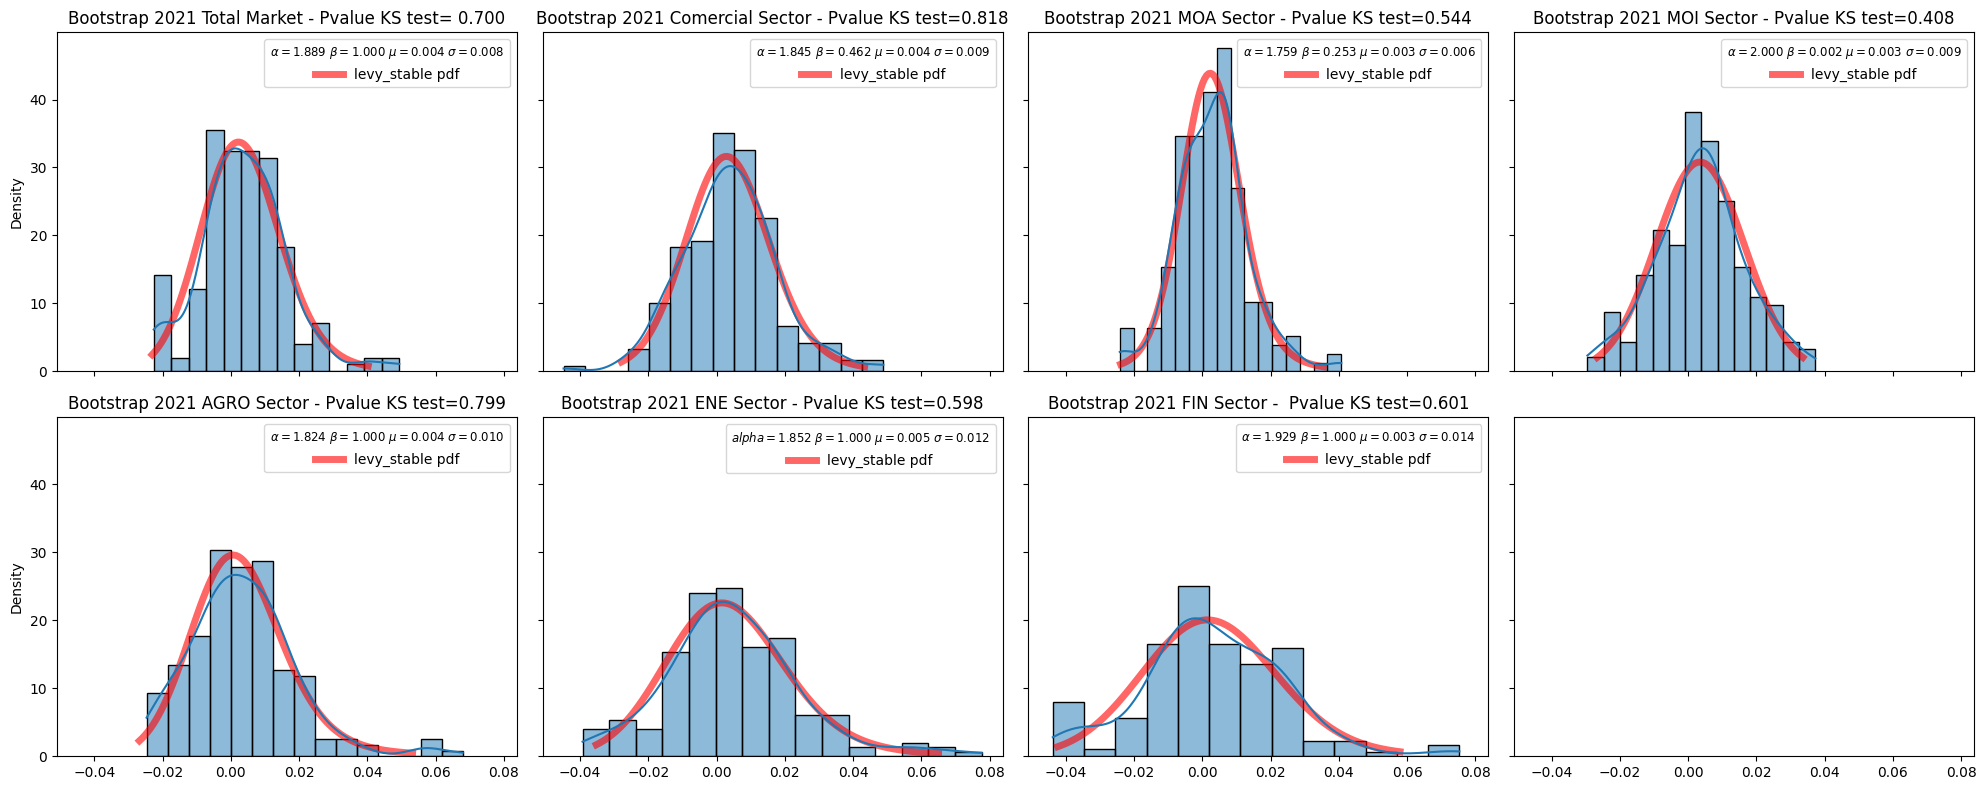

In [49]:
fig, ax = plt.subplots(2, 4, sharey=True, sharex=True)
fig.set_size_inches(20, 8)
#todo
alpha, beta, loc, scale = alphat, betat, loct, scalet
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,0].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,0],data=y21ss,stat = "density",kde=True)
ax[0,0].set_title(f"Bootstrap 2021 Total Market - Pvalue KS test= {ktestt.pvalue:.3f}")
ax[0,0].legend(title=fr"$\alpha=${alphat:.3f} $\beta=${betat:.3f} $\mu=${loct:.3f} $\sigma=${scalet:.3f}", title_fontsize = "8.5")

#come
alpha, beta, loc, scale = alpha_come, beta_come, loc_come, scale_come 
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,1].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,1],data=y21scomes, stat = "density",kde=True)
ax[0,1].set_title(f"Bootstrap 2021 Comercial Sector - Pvalue KS test={ktestcom.pvalue:.3f}")
ax[0,1].legend(title=fr"$\alpha=${alpha_come:.3f} $\beta=${beta_come:.3f} $\mu=${loc_come:.3f} $\sigma=${scale_come:.3f}", title_fontsize = "8.5")

#moa
alpha, beta, loc, scale = alphamoa, betamoa, locmoa, scalemoa
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,2].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,2],data=y21smoas, stat = "density",kde=True)
ax[0,2].set_title(f"Bootstrap 2021 MOA Sector - Pvalue KS test={ktestmoa.pvalue:.3f}")
ax[0,2].legend(title=fr"$\alpha=${alphamoa:.3f} $\beta=${betamoa:.3f} $\mu=${locmoa:.3f} $\sigma=${scalemoa:.3f}", title_fontsize = "8.5")

#moi
alpha, beta, loc, scale = alphamoi, betamoi, locmoi, scalemoi
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,3].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,3],data=y21smois, stat = "density",kde=True)
ax[0,3].set_title(f"Bootstrap 2021 MOI Sector - Pvalue KS test={ktestmoi.pvalue:.3f}" )
ax[0,3].legend(title=fr"$\alpha=${alphamoi:.3f} $\beta=${betamoi:.3f} $\mu=${locmoi:.3f} $\sigma=${scalemoi:.3f}", title_fontsize = "8.5")

#agro
alpha, beta, loc, scale = alphaagro, betaagro, locagro, scaleagro
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,0].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,0],data=y21sagros, stat = "density",kde=True)
ax[1,0].set_title(f"Bootstrap 2021 AGRO Sector - Pvalue KS test={ktestagro.pvalue:.3f}")
ax[1,0].legend(title=fr"$\alpha=${alphaagro:.3f} $\beta=${betaagro:.3f} $\mu=${locagro:.3f} $\sigma=${scaleagro:.3f}", title_fontsize = "8.5")

#ene
alpha, beta, loc, scale = alphaene, betaene, locene, scaleene
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,1].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,1],data=y21senes, stat = "density",kde=True)
ax[1,1].set_title(f"Bootstrap 2021 ENE Sector - Pvalue KS test={ktestene.pvalue:.3f}")
ax[1,1].legend(title=fr"$alpha=${alphaene:.3f} $\beta=${betaene:.3f} $\mu=${locene:.3f} $\sigma=${scaleene:.3f}", title_fontsize = "8.5")

#FIN
alpha, beta, loc, scale = alphafin, betafin, locfin, scalefin
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,2].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,2],data=y21sfins, stat = "density",kde=True)
ax[1,2].set_title(f"Bootstrap 2021 FIN Sector -  Pvalue KS test={ktestfin.pvalue:.3f}")
ax[1,2].legend(title=fr"$\alpha=${alphafin:.3f} $\beta=${betafin:.3f} $\mu=${locfin:.3f} $\sigma=${scalefin:.3f}", title_fontsize = "8.5")


fig.tight_layout()

In [50]:
sample_merval21= merval21.sample(frac=0.5, replace=True, random_state=1)
sample_merval21

Stocks,ALUA,BBAR,BYMA,CEPU,COME,CRES,CVH,EDN,GGAL,HARG,...,MOLA,MOLI,MORI,OEST,PATA,POLL,RIGO,SAMI,SEMI,TGLT
Days,,,,,,,,,,,,,,,,,,,,,
2021-03-01,0.014024,0.003652,0.021087,0.023401,-0.019608,-0.043536,-0.017544,0.025926,0.023524,-0.002020,...,0.008035,-0.001247,-0.003215,-0.002096,-0.002976,0.077778,0.015038,-0.002101,-0.016100,0.020942
2021-12-23,0.024202,0.020322,0.031205,0.029366,0.001681,0.000996,0.021193,0.024510,0.003778,0.004280,...,0.016570,0.012295,-0.024922,0.048493,0.056319,0.000000,-0.006579,-0.001786,0.005025,0.008021
2021-08-05,0.020067,0.018241,0.012025,0.010576,0.043478,-0.001359,0.007587,0.003764,0.015326,0.024931,...,0.036893,0.028185,0.003333,0.006849,0.028037,0.000000,-0.027211,0.049180,0.009259,0.005263
2021-04-22,-0.017065,-0.023846,0.000000,-0.006309,0.017021,-0.014793,0.000000,0.001835,-0.014912,-0.022770,...,-0.001935,-0.024390,0.003311,0.038375,0.000000,0.032609,0.128000,-0.025229,0.000000,-0.012346
2021-08-02,0.019900,-0.013506,0.006410,0.026876,0.039261,0.020490,-0.016224,0.033333,-0.001403,0.019886,...,-0.019016,0.002342,-0.025890,-0.005063,-0.006211,-0.006667,-0.013423,0.016985,0.018349,0.026316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-13,0.000000,-0.008436,0.003180,-0.004732,-0.004202,-0.042721,0.005650,-0.016453,0.000907,0.001996,...,0.012187,-0.016129,0.003311,0.004566,-0.003165,0.000000,-0.003802,0.006536,0.001852,-0.017595
2021-06-23,0.029668,-0.030806,-0.008486,0.003525,0.018127,0.006757,0.013605,0.024600,-0.012716,0.033019,...,0.015625,0.017143,0.000000,-0.015385,0.000000,-0.010870,0.000000,0.010121,0.033272,-0.005291
2021-04-29,0.009751,0.001443,-0.016141,0.007752,-0.016194,-0.020583,-0.003521,-0.001815,-0.018526,0.005906,...,-0.012346,0.009333,-0.006623,-0.004283,-0.031250,0.000000,-0.026846,-0.008850,0.001855,0.011730


In [51]:
y21scomes50 = sample_merval21[come].mean(axis = 1, skipna = True) 
alpha_come, beta_come, loc_come, scale_come = scipy.stats.levy_stable.fit(y21scomes50)
alpha_come, beta_come, loc_come, scale_come 


(1.8946502296762355,
 -0.09294434315640523,
 0.002995734621021372,
 0.008960511614957256)

In [52]:
ktestcom = scipy.stats.ks_1samp(x=y21scomes50, cdf=scipy.stats.levy_stable.cdf, args=(alpha_come, beta_come, loc_come, scale_come ))
ktestcom

KstestResult(statistic=0.062292939297967864, pvalue=0.7163773819653725, statistic_location=-0.0008295474825981849, statistic_sign=-1)

In [53]:
y21smoas50 = sample_merval21[moa].mean(axis = 1, skipna = True) 
alphamoa, betamoa, locmoa, scalemoa = scipy.stats.levy_stable.fit(y21smoas50)
alphamoa, betamoa, locmoa, scalemoa

(1.8547204467833955,
 -0.0357654200920285,
 0.002404849436690232,
 0.006282126842422741)

In [54]:
ktestmoa = scipy.stats.ks_1samp(x=y21smoas50, cdf=scipy.stats.levy_stable.cdf, args=(alphamoa, betamoa, locmoa, scalemoa))
ktestmoa

KstestResult(statistic=0.05086188604790637, pvalue=0.8996721934637245, statistic_location=-0.0012119191588210547, statistic_sign=1)

In [55]:
y21smois50 = sample_merval21[moi].mean(axis = 1, skipna = True) 
alphamoi, betamoi, locmoi, scalemoi = scipy.stats.levy_stable.fit(y21smois50)
alphamoi, betamoi, locmoi, scalemoi

(1.9999900090991738,
 0.023382958490558485,
 0.0034258774172853924,
 0.008519244532283064)

In [56]:
ktestmoi = scipy.stats.ks_1samp(x=y21smois50, cdf=scipy.stats.levy_stable.cdf, args=(alphamoa, betamoa, locmoa, scalemoa))
ktestmoi

KstestResult(statistic=0.12573141987226732, pvalue=0.04111491152527656, statistic_location=0.005874918415576635, statistic_sign=-1)

In [57]:
y21sagros50 = sample_merval21[agro].mean(axis = 1, skipna = True) 
alphaagro, betaagro, locagro, scaleagro = scipy.stats.levy_stable.fit(y21sagros50)
alphaagro, betaagro, locagro, scaleagro

(1.8422130535196182,
 0.9999809800993567,
 0.0030622159891642957,
 0.008902535267653817)

In [58]:
ktestagro =scipy.stats.ks_1samp(x=y21sagros50, cdf=scipy.stats.levy_stable.cdf, args=(alphaagro, betaagro, locagro, scaleagro))
ktestagro 

KstestResult(statistic=0.0559740500219994, pvalue=0.8258180174099299, statistic_location=0.00782175530681506, statistic_sign=-1)

In [59]:
y21senes50 = sample_merval21[ene].mean(axis = 1, skipna = True) 
alphaene, betaene, locene, scaleene = scipy.stats.levy_stable.fit(y21senes50)
alphaene, betaene, locene, scaleene

(2.0, 1.0, 0.0023333184620696126, 0.01309982152906788)

In [60]:
ktestene= scipy.stats.ks_1samp(x=y21senes50, cdf=scipy.stats.levy_stable.cdf, args=(alphaene, betaene, locene, scaleene))
ktestene

KstestResult(statistic=0.05457016225344957, pvalue=0.8477852281383234, statistic_location=-0.015870175772972502, statistic_sign=-1)

In [62]:
y21sfins50 = sample_merval21[fin].mean(axis = 1, skipna = True) 
alphafin, betafin, locfin, scalefin = scipy.stats.levy_stable.fit(y21sfins50)
alphafin, betafin, locfin, scalefin

(1.9550250232475967,
 -0.00030643863181972433,
 0.0029931400126115186,
 0.013545037620404158)

In [63]:
ktestfin= scipy.stats.ks_1samp(x=y21sfins50, cdf=scipy.stats.levy_stable.cdf, args=(alphafin, betafin, locfin, scalefin))
ktestfin

KstestResult(statistic=0.06548483996905596, pvalue=0.6576281543162115, statistic_location=0.0014485546770399889, statistic_sign=1)

In [64]:
y21ss50 = sample_merval21.mean(axis = 1, skipna = True) 
alphat, betat, loct, scalet = scipy.stats.levy_stable.fit(y21ss50)
alphat, betat, loct, scalet

(1.8850258553638894,
 0.999973519597876,
 0.00346010842765641,
 0.007983564165345174)

In [65]:
ktestt= scipy.stats.ks_1samp(x=y21ss50, cdf=scipy.stats.levy_stable.cdf, args=(alphat, betat, loct, scalet))
ktestt

KstestResult(statistic=0.060560669818494894, pvalue=0.7476422563740377, statistic_location=-0.007952498226054837, statistic_sign=-1)

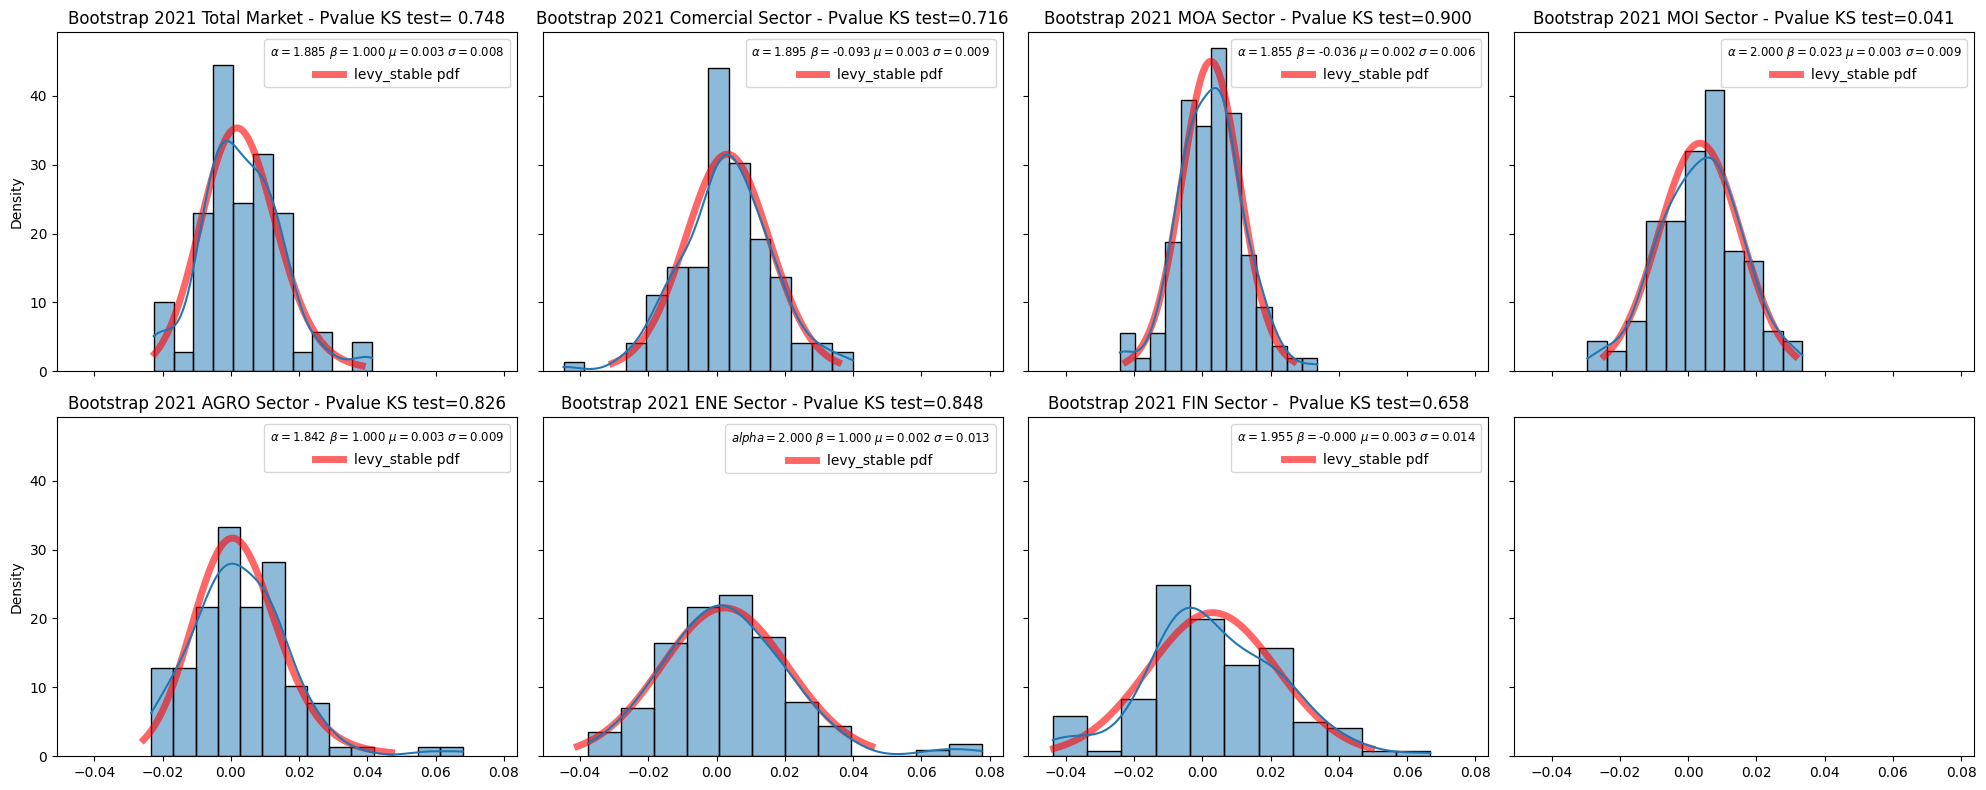

In [66]:
fig, ax = plt.subplots(2, 4, sharey=True, sharex=True)
fig.set_size_inches(20, 8)
#todo
alpha, beta, loc, scale = alphat, betat, loct, scalet
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,0].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,0],data=y21ss50,stat = "density",kde=True)
ax[0,0].set_title(f"Bootstrap 2021 Total Market - Pvalue KS test= {ktestt.pvalue:.3f}")
ax[0,0].legend(title=fr"$\alpha=${alphat:.3f} $\beta=${betat:.3f} $\mu=${loct:.3f} $\sigma=${scalet:.3f}", title_fontsize = "8.5")

#come
alpha, beta, loc, scale = alpha_come, beta_come, loc_come, scale_come 
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,1].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,1],data=y21scomes50, stat = "density",kde=True)
ax[0,1].set_title(f"Bootstrap 2021 Comercial Sector - Pvalue KS test={ktestcom.pvalue:.3f}")
ax[0,1].legend(title=fr"$\alpha=${alpha_come:.3f} $\beta=${beta_come:.3f} $\mu=${loc_come:.3f} $\sigma=${scale_come:.3f}", title_fontsize = "8.5")

#moa
alpha, beta, loc, scale = alphamoa, betamoa, locmoa, scalemoa
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,2].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,2],data=y21smoas50, stat = "density",kde=True)
ax[0,2].set_title(f"Bootstrap 2021 MOA Sector - Pvalue KS test={ktestmoa.pvalue:.3f}")
ax[0,2].legend(title=fr"$\alpha=${alphamoa:.3f} $\beta=${betamoa:.3f} $\mu=${locmoa:.3f} $\sigma=${scalemoa:.3f}", title_fontsize = "8.5")

#moi
alpha, beta, loc, scale = alphamoi, betamoi, locmoi, scalemoi
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,3].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,3],data=y21smois50, stat = "density",kde=True)
ax[0,3].set_title(f"Bootstrap 2021 MOI Sector - Pvalue KS test={ktestmoi.pvalue:.3f}" )
ax[0,3].legend(title=fr"$\alpha=${alphamoi:.3f} $\beta=${betamoi:.3f} $\mu=${locmoi:.3f} $\sigma=${scalemoi:.3f}", title_fontsize = "8.5")

#agro
alpha, beta, loc, scale = alphaagro, betaagro, locagro, scaleagro
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,0].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,0],data=y21sagros50, stat = "density",kde=True)
ax[1,0].set_title(f"Bootstrap 2021 AGRO Sector - Pvalue KS test={ktestagro.pvalue:.3f}")
ax[1,0].legend(title=fr"$\alpha=${alphaagro:.3f} $\beta=${betaagro:.3f} $\mu=${locagro:.3f} $\sigma=${scaleagro:.3f}", title_fontsize = "8.5")

#ene
alpha, beta, loc, scale = alphaene, betaene, locene, scaleene
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,1].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,1],data=y21senes50, stat = "density",kde=True)
ax[1,1].set_title(f"Bootstrap 2021 ENE Sector - Pvalue KS test={ktestene.pvalue:.3f}")
ax[1,1].legend(title=fr"$alpha=${alphaene:.3f} $\beta=${betaene:.3f} $\mu=${locene:.3f} $\sigma=${scaleene:.3f}", title_fontsize = "8.5")

#FIN
alpha, beta, loc, scale = alphafin, betafin, locfin, scalefin
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,2].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,2],data=y21sfins50, stat = "density",kde=True)
ax[1,2].set_title(f"Bootstrap 2021 FIN Sector -  Pvalue KS test={ktestfin.pvalue:.3f}")
ax[1,2].legend(title=fr"$\alpha=${alphafin:.3f} $\beta=${betafin:.3f} $\mu=${locfin:.3f} $\sigma=${scalefin:.3f}", title_fontsize = "8.5")


fig.tight_layout()

In [107]:
merval20 = gp.datasets.load_MERVAL(
    first="01-02-2020", last = "12-31-2020")
merval20 = merval20.as_returns()

In [108]:
y20scome = merval20[come].mean(axis = 1, skipna = True) 
alpha_come, beta_come, loc_come, scale_come = scipy.stats.levy_stable.fit(y20scome)
alpha_come, beta_come, loc_come, scale_come 

(1.606068031148807,
 -0.014170674070088764,
 0.001753196459273034,
 0.010583759011642931)

In [109]:
ktestcom =scipy.stats.ks_1samp(x=y20scome, cdf=scipy.stats.levy_stable.cdf, args=(alpha_come, beta_come, loc_come, scale_come ))
ktestcom

KstestResult(statistic=0.032354251263514044, pvalue=0.9561381896681697, statistic_location=0.0003141795446120527, statistic_sign=1)

In [110]:
y20smoa = merval20[moa].mean(axis = 1, skipna = True) 
alphamoa, betamoa, locmoa, scalemoa = scipy.stats.levy_stable.fit(y20smoa)
alphamoa, betamoa, locmoa, scalemoa

(1.6336213658969079,
 0.10465851852609709,
 0.00235355697136074,
 0.011398936158531634)

In [71]:
ktestmoa = scipy.stats.ks_1samp(x=y20smoa, cdf=scipy.stats.levy_stable.cdf, args=(alphamoa, betamoa, locmoa, scalemoa))
ktestmoa

KstestResult(statistic=0.06427058628694104, pvalue=0.2632338384016789, statistic_location=0.008727503573810826, statistic_sign=1)

In [111]:
y20smoi = merval20[moi].mean(axis = 1, skipna = True) 
alphamoi, betamoi, locmoi, scalemoi = scipy.stats.levy_stable.fit(y20smoi)
alphamoi, betamoi, locmoi, scalemoi

(1.5808367627500926,
 0.002182026030197981,
 0.0027609914354161953,
 0.012575073539409051)

In [112]:
ktestmoi=scipy.stats.ks_1samp(x=y20smoi, cdf=scipy.stats.levy_stable.cdf, args=(alphamoi, betamoi, locmoi, scalemoi))

In [113]:
y20sagro = merval20[agro].mean(axis = 1, skipna = True) 
alphaagro, betaagro, locagro, scaleagro = scipy.stats.levy_stable.fit(y20sagro)
alphaagro, betaagro, locagro, scaleagro

(1.7496693176169114,
 -0.08066739760286218,
 0.001550030936456154,
 0.01250457103981547)

In [114]:
ktestagro = scipy.stats.ks_1samp(x=y20sagro, cdf=scipy.stats.levy_stable.cdf, args=(alphaagro, betaagro, locagro, scaleagro))
ktestagro

KstestResult(statistic=0.036160714440181874, pvalue=0.9007801625171521, statistic_location=0.009072722683097528, statistic_sign=1)

In [115]:
y20sene = merval20[ene].mean(axis = 1, skipna = True) 
alphaene, betaene, locene, scaleene = scipy.stats.levy_stable.fit(y20sene)
alphaene, betaene, locene, scaleene

(1.6522562056310057,
 -0.3819425699068364,
 0.0003959930750143712,
 0.015137920473089511)

In [116]:
ktestene = scipy.stats.ks_1samp(x=y20sene, cdf=scipy.stats.levy_stable.cdf, args=(alphaene, betaene, locene, scaleene))
ktestene

KstestResult(statistic=0.040679053961263534, pvalue=0.8064778452109039, statistic_location=-0.008112325459433403, statistic_sign=-1)

In [117]:
y20sfin = merval20[fin].mean(axis = 1, skipna = True) 
alphafin, betafin, locfin, scalefin = scipy.stats.levy_stable.fit(y20sfin)
alphafin, betafin, locfin, scalefin

(1.7447137945415714,
 0.02145802928454803,
 0.0020913010321036074,
 0.02141882431093402)

In [118]:
ktestfin = scipy.stats.ks_1samp(x=y20sfin, cdf=scipy.stats.levy_stable.cdf, args=(alphafin, betafin, locfin, scalefin))
ktestfin

KstestResult(statistic=0.03978483786740883, pvalue=0.8270929662042023, statistic_location=0.00368311758451619, statistic_sign=1)

In [119]:
y20s = merval20.mean(axis = 1, skipna = True) 
alphat, betat, loct, scalet = scipy.stats.levy_stable.fit(y20s)
alphat, betat, loct, scalet

(1.6235740841618886,
 -0.27653155791915995,
 0.0016505751444473877,
 0.012041680224817433)

In [120]:
ktestt= scipy.stats.ks_1samp(x=y20s, cdf=scipy.stats.levy_stable.cdf, args=(alphat, betat, loct, scalet))
ktestt

KstestResult(statistic=0.04252584264437512, pvalue=0.7617126139409083, statistic_location=-0.01061750902297504, statistic_sign=-1)

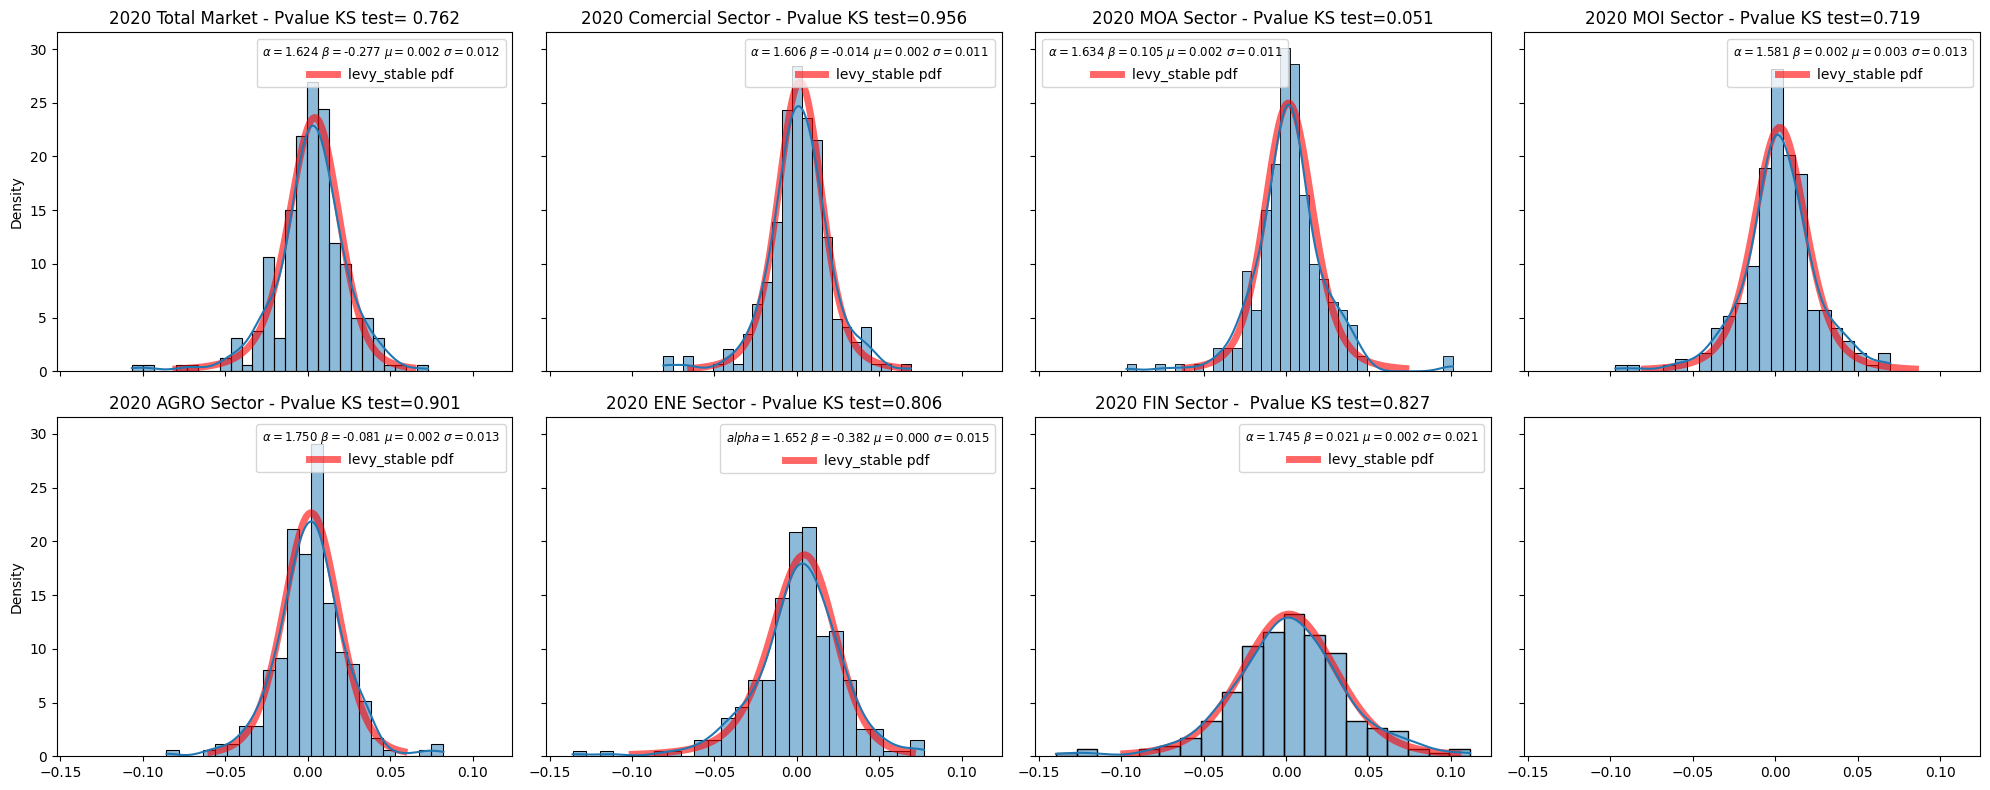

In [121]:
fig, ax = plt.subplots(2, 4, sharey=True, sharex=True)
fig.set_size_inches(20, 8)
#todo
alpha, beta, loc, scale = alphat, betat, loct, scalet
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,0].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,0],data=y20s,stat = "density",kde=True)
ax[0,0].set_title(f"2020 Total Market - Pvalue KS test= {ktestt.pvalue:.3f}")
ax[0,0].legend(title=fr"$\alpha=${alphat:.3f} $\beta=${betat:.3f} $\mu=${loct:.3f} $\sigma=${scalet:.3f}", title_fontsize = "8.5")

#come
alpha, beta, loc, scale = alpha_come, beta_come, loc_come, scale_come 
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,1].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,1],data=y20scome, stat = "density",kde=True)
ax[0,1].set_title(f"2020 Comercial Sector - Pvalue KS test={ktestcom.pvalue:.3f}")
ax[0,1].legend(title=fr"$\alpha=${alpha_come:.3f} $\beta=${beta_come:.3f} $\mu=${loc_come:.3f} $\sigma=${scale_come:.3f}", title_fontsize = "8.5")

#moa
alpha, beta, loc, scale = alphamoa, betamoa, locmoa, scalemoa
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,2].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,2],data=y20smoa, stat = "density",kde=True)
ax[0,2].set_title(f"2020 MOA Sector - Pvalue KS test={ktestmoa.pvalue:.3f}")
ax[0,2].legend(title=fr"$\alpha=${alphamoa:.3f} $\beta=${betamoa:.3f} $\mu=${locmoa:.3f} $\sigma=${scalemoa:.3f}", title_fontsize = "8.5")

#moi
alpha, beta, loc, scale = alphamoi, betamoi, locmoi, scalemoi
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,3].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,3],data=y20smoi, stat = "density",kde=True)
ax[0,3].set_title(f"2020 MOI Sector - Pvalue KS test={ktestmoi.pvalue:.3f}" )
ax[0,3].legend(title=fr"$\alpha=${alphamoi:.3f} $\beta=${betamoi:.3f} $\mu=${locmoi:.3f} $\sigma=${scalemoi:.3f}", title_fontsize = "8.5")

#agro
alpha, beta, loc, scale = alphaagro, betaagro, locagro, scaleagro
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,0].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,0],data=y20sagro, stat = "density",kde=True)
ax[1,0].set_title(f"2020 AGRO Sector - Pvalue KS test={ktestagro.pvalue:.3f}")
ax[1,0].legend(title=fr"$\alpha=${alphaagro:.3f} $\beta=${betaagro:.3f} $\mu=${locagro:.3f} $\sigma=${scaleagro:.3f}", title_fontsize = "8.5")

#ene
alpha, beta, loc, scale = alphaene, betaene, locene, scaleene
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,1].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,1],data=y20sene, stat = "density",kde=True)
ax[1,1].set_title(f"2020 ENE Sector - Pvalue KS test={ktestene.pvalue:.3f}")
ax[1,1].legend(title=fr"$alpha=${alphaene:.3f} $\beta=${betaene:.3f} $\mu=${locene:.3f} $\sigma=${scaleene:.3f}", title_fontsize = "8.5")

#FIN
alpha, beta, loc, scale = alphafin, betafin, locfin, scalefin
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,2].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,2],data=y20sfin, stat = "density",kde=True)
ax[1,2].set_title(f"2020 FIN Sector -  Pvalue KS test={ktestfin.pvalue:.3f}")
ax[1,2].legend(title=fr"$\alpha=${alphafin:.3f} $\beta=${betafin:.3f} $\mu=${locfin:.3f} $\sigma=${scalefin:.3f}", title_fontsize = "8.5")


fig.tight_layout()

In [85]:
sample_merval20= merval20.sample(frac=0.8, replace=True, random_state=1)
sample_merval20

Stocks,ALUA,BBAR,BYMA,CEPU,COME,CRES,CVH,EDN,GGAL,HARG,...,MOLA,MOLI,MORI,OEST,PATA,POLL,RIGO,SAMI,SEMI,TGLT
Days,,,,,,,,,,,,,,,,,,,,,
2020-02-27,-0.070397,-0.010287,-0.031088,-0.036260,-0.013761,-0.021014,-0.014241,-0.032663,-0.007863,-0.042607,...,-0.044223,-0.014308,-0.059854,0.003584,-0.058333,0.000000,-0.056604,-0.026316,0.000000,-0.037736
2020-12-22,0.034921,0.030345,0.015833,-0.008219,0.008197,0.022663,0.007075,0.002012,0.008358,0.026104,...,-0.015942,0.000000,0.000000,0.010471,-0.029178,0.000000,0.000000,-0.010593,-0.007353,0.007905
2020-08-04,0.019231,-0.022995,0.066000,0.011429,0.035370,-0.030769,0.003226,0.030242,-0.031534,0.081281,...,-0.012121,-0.041485,-0.013333,-0.014925,-0.006452,-0.066667,0.068182,-0.023649,-0.028662,0.020513
2020-04-23,0.009158,-0.032796,-0.010526,-0.008097,0.016484,0.019667,-0.020270,-0.009036,-0.040857,-0.008108,...,0.034667,-0.005495,0.069307,-0.012876,0.005952,-0.012500,0.008333,0.018868,0.043796,0.002747
2020-07-30,0.028604,0.031940,0.009667,0.007645,-0.003289,-0.024313,0.005624,0.008621,0.007879,-0.015228,...,0.000000,-0.011416,0.005155,0.000000,-0.012658,-0.032258,-0.031579,0.000000,0.009479,-0.085837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-16,-0.017893,-0.084892,-0.068517,-0.075630,-0.061856,-0.030075,-0.066576,-0.063679,-0.090257,-0.050926,...,-0.033663,-0.020737,-0.067227,-0.043573,-0.031662,0.000000,0.000000,-0.023622,-0.037415,-0.050000
2020-01-31,0.001536,0.001515,-0.039927,-0.023292,0.000000,0.002073,-0.016304,-0.024390,-0.016103,-0.010471,...,0.001346,-0.010160,0.033566,0.019672,0.013158,-0.011628,0.000000,0.024590,-0.013333,-0.008210
2020-07-01,0.038781,0.035662,0.009223,0.016981,0.004525,0.041074,0.043956,0.027094,0.026647,-0.007042,...,0.010893,-0.006283,0.017422,-0.015504,-0.043056,0.000000,0.043956,0.000000,0.009804,0.047458


In [86]:
y20scomes = sample_merval20[come].mean(axis = 1, skipna = True) 
alpha_come, beta_come, loc_come, scale_come = scipy.stats.levy_stable.fit(y20scomes)
alpha_come, beta_come, loc_come, scale_come 

(1.567681488415117,
 0.21335422020033368,
 0.002607017919995987,
 0.009876749939727005)

In [87]:
ktestcom =scipy.stats.ks_1samp(x=y20scomes, cdf=scipy.stats.levy_stable.cdf, args=(alpha_come, beta_come, loc_come, scale_come ))
ktestcom

KstestResult(statistic=0.04665521181248322, pvalue=0.7794785517249012, statistic_location=-0.0065826267966367724, statistic_sign=-1)

In [88]:
y20smoas = sample_merval20[moa].mean(axis = 1, skipna = True) 
alphamoa, betamoa, locmoa, scalemoa = scipy.stats.levy_stable.fit(y20smoas)
alphamoa, betamoa, locmoa, scalemoa

(1.9047615228581734,
 0.7296145017978803,
 0.0035446041576485785,
 0.012508684325477401)

In [89]:
ktestmoa =scipy.stats.ks_1samp(x=y20scomes, cdf=scipy.stats.levy_stable.cdf, args=(alphamoa, betamoa, locmoa, scalemoa))
ktestmoa

KstestResult(statistic=0.09691504475187684, pvalue=0.050705337655511884, statistic_location=0.010027061421129291, statistic_sign=1)

In [90]:
y20smois = sample_merval20[moi].mean(axis = 1, skipna = True) 
alphamoi, betamoi, locmoi, scalemoi = scipy.stats.levy_stable.fit(y20smois)
alphamoi, betamoi, locmoi, scalemoi

(1.7975038551258944,
 0.44745925165698286,
 0.004744599396341986,
 0.014378653968755286)

In [94]:
ktestmoi=scipy.stats.ks_1samp(x=y20smois, cdf=scipy.stats.levy_stable.cdf, args=(alphamoi, betamoi, locmoi, scalemoi))
ktestmoi

KstestResult(statistic=0.0645048054522912, pvalue=0.38500937886684694, statistic_location=-0.0037249687124583097, statistic_sign=-1)

In [95]:
y20sagros = sample_merval20[agro].mean(axis = 1, skipna = True) 
alphaagro, betaagro, locagro, scaleagro = scipy.stats.levy_stable.fit(y20sagros)
alphaagro, betaagro, locagro, scaleagro

(1.5326008149317372,
 0.3750426798123261,
 0.003411834344238921,
 0.01040450896379577)

In [97]:
ktestagro=scipy.stats.ks_1samp(x=y20sagros, cdf=scipy.stats.levy_stable.cdf, args=(alphaagro, betaagro, locagro, scaleagro))
ktestagro

KstestResult(statistic=0.05791482592158537, pvalue=0.5212041848845954, statistic_location=-0.002387146482144248, statistic_sign=1)

In [99]:
y20senes = sample_merval20[ene].mean(axis = 1, skipna = True) 
alphaene, betaene, locene, scaleene = scipy.stats.levy_stable.fit(y20senes)
alphaene, betaene, locene, scaleene

(1.8303837527933924,
 0.13203155036227465,
 0.0008719412046280489,
 0.015882556943931588)

In [100]:
ktestene=scipy.stats.ks_1samp(x=y20senes, cdf=scipy.stats.levy_stable.cdf, args=(alphaene, betaene, locene, scaleene))
ktestene

KstestResult(statistic=0.05109559738746511, pvalue=0.678374291061476, statistic_location=-0.009512436001661543, statistic_sign=-1)

In [101]:
y20sfins = sample_merval20[fin].mean(axis = 1, skipna = True) 
alphafin, betafin, locfin, scalefin = scipy.stats.levy_stable.fit(y20sfins)
alphafin, betafin, locfin, scalefin

(1.8112256255472508,
 0.8041220358663912,
 0.0020571392654822073,
 0.020710746535485942)

In [102]:
ktestfin=scipy.stats.ks_1samp(x=y20sfins, cdf=scipy.stats.levy_stable.cdf, args=(alphafin, betafin, locfin, scalefin))
ktestfin

KstestResult(statistic=0.0695856705754701, pvalue=0.29648735373133484, statistic_location=-0.003250031015769317, statistic_sign=-1)

In [103]:
y20ss = sample_merval20.mean(axis = 1, skipna = True) 
alphat, betat, loct, scalet = scipy.stats.levy_stable.fit(y20ss)
alphat, betat, loct, scalet

(1.6454471168869849,
 -0.14011342599034973,
 0.0021105389668384955,
 0.01177042255289893)

In [105]:
ktestt= scipy.stats.ks_1samp(x=y20ss, cdf=scipy.stats.levy_stable.cdf, args=(alphat, betat, loct, scalet))
ktestt

KstestResult(statistic=0.06886159926977276, pvalue=0.3081592523406338, statistic_location=-0.002924486376971268, statistic_sign=-1)

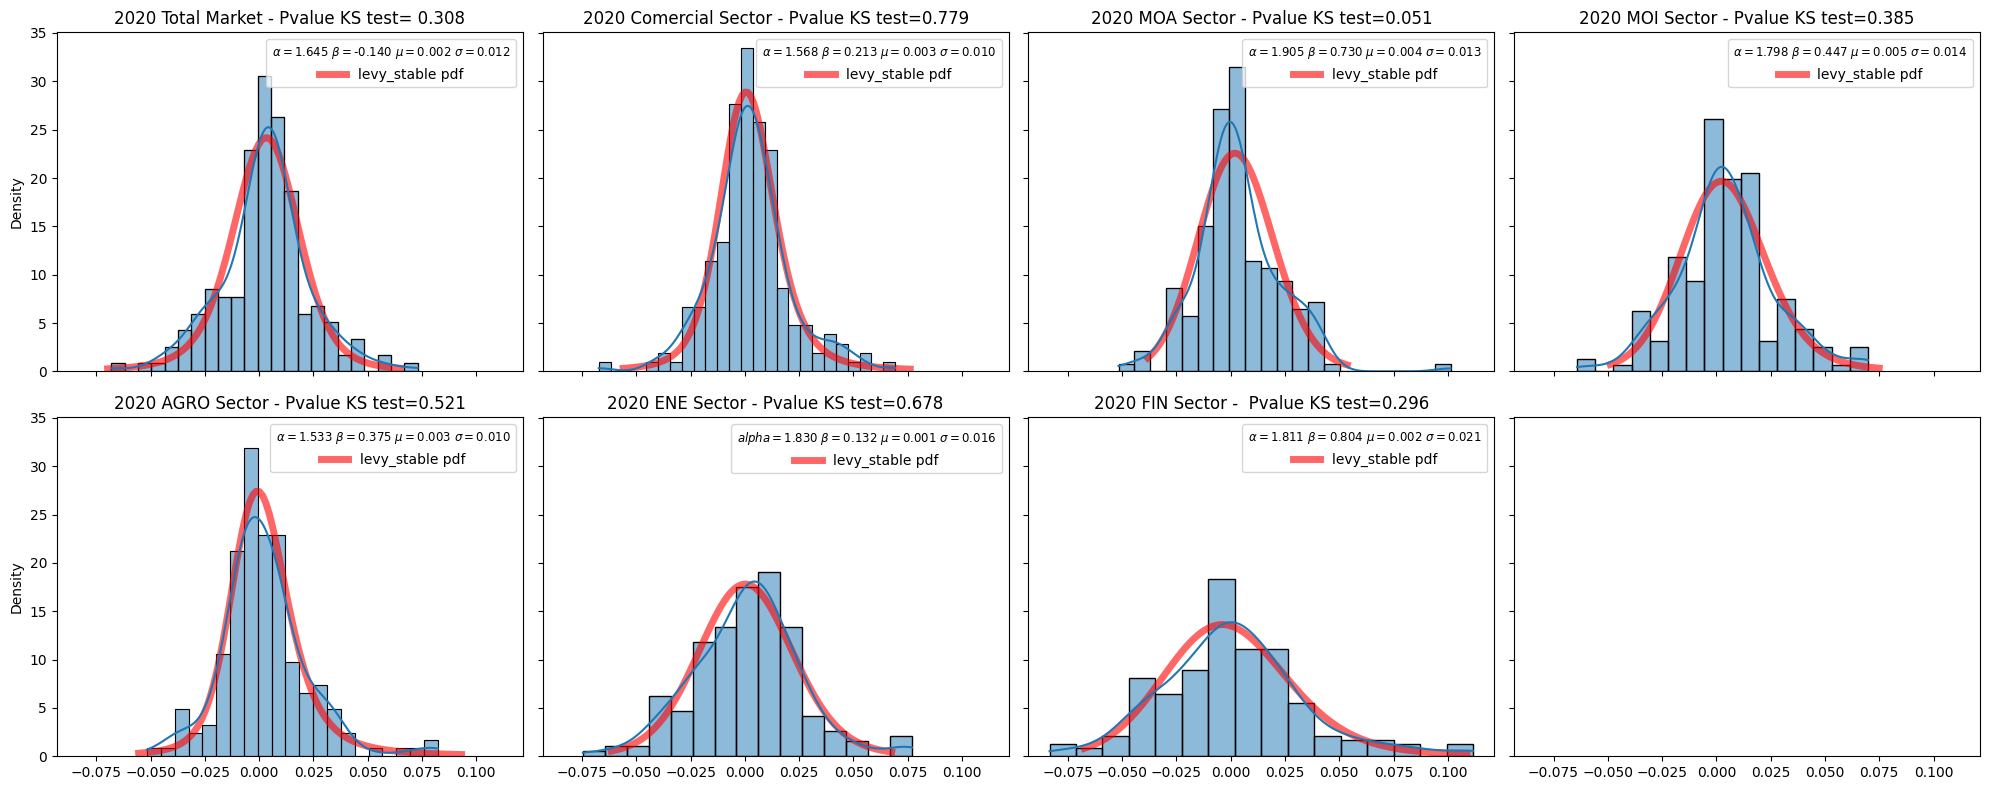

In [106]:
fig, ax = plt.subplots(2, 4, sharey=True, sharex=True)
fig.set_size_inches(20, 8)
#todo
alpha, beta, loc, scale = alphat, betat, loct, scalet
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,0].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,0],data=y20ss,stat = "density",kde=True)
ax[0,0].set_title(f"2020 Total Market - Pvalue KS test= {ktestt.pvalue:.3f}")
ax[0,0].legend(title=fr"$\alpha=${alphat:.3f} $\beta=${betat:.3f} $\mu=${loct:.3f} $\sigma=${scalet:.3f}", title_fontsize = "8.5")

#come
alpha, beta, loc, scale = alpha_come, beta_come, loc_come, scale_come 
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,1].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,1],data=y20scomes, stat = "density",kde=True)
ax[0,1].set_title(f"2020 Comercial Sector - Pvalue KS test={ktestcom.pvalue:.3f}")
ax[0,1].legend(title=fr"$\alpha=${alpha_come:.3f} $\beta=${beta_come:.3f} $\mu=${loc_come:.3f} $\sigma=${scale_come:.3f}", title_fontsize = "8.5")

#moa
alpha, beta, loc, scale = alphamoa, betamoa, locmoa, scalemoa
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,2].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,2],data=y20smoas, stat = "density",kde=True)
ax[0,2].set_title(f"2020 MOA Sector - Pvalue KS test={ktestmoa.pvalue:.3f}")
ax[0,2].legend(title=fr"$\alpha=${alphamoa:.3f} $\beta=${betamoa:.3f} $\mu=${locmoa:.3f} $\sigma=${scalemoa:.3f}", title_fontsize = "8.5")

#moi
alpha, beta, loc, scale = alphamoi, betamoi, locmoi, scalemoi
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[0,3].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[0,3],data=y20smois, stat = "density",kde=True)
ax[0,3].set_title(f"2020 MOI Sector - Pvalue KS test={ktestmoi.pvalue:.3f}" )
ax[0,3].legend(title=fr"$\alpha=${alphamoi:.3f} $\beta=${betamoi:.3f} $\mu=${locmoi:.3f} $\sigma=${scalemoi:.3f}", title_fontsize = "8.5")

#agro
alpha, beta, loc, scale = alphaagro, betaagro, locagro, scaleagro
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,0].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,0],data=y20sagros, stat = "density",kde=True)
ax[1,0].set_title(f"2020 AGRO Sector - Pvalue KS test={ktestagro.pvalue:.3f}")
ax[1,0].legend(title=fr"$\alpha=${alphaagro:.3f} $\beta=${betaagro:.3f} $\mu=${locagro:.3f} $\sigma=${scaleagro:.3f}", title_fontsize = "8.5")

#ene
alpha, beta, loc, scale = alphaene, betaene, locene, scaleene
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,1].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,1],data=y20senes, stat = "density",kde=True)
ax[1,1].set_title(f"2020 ENE Sector - Pvalue KS test={ktestene.pvalue:.3f}")
ax[1,1].legend(title=fr"$alpha=${alphaene:.3f} $\beta=${betaene:.3f} $\mu=${locene:.3f} $\sigma=${scaleene:.3f}", title_fontsize = "8.5")

#FIN
alpha, beta, loc, scale = alphafin, betafin, locfin, scalefin
x = np.linspace(scipy.stats.levy_stable.ppf(0.01, alpha, beta, loc, scale),
                scipy.stats.levy_stable.ppf(0.99, alpha, beta, loc, scale), 100)
ax[1,2].plot(x, scipy.stats.levy_stable.pdf(x, alpha, beta,loc,scale),'r-', lw=5, alpha=0.6, label='levy_stable pdf')
sns.histplot(ax=ax[1,2],data=y20sfins, stat = "density",kde=True)
ax[1,2].set_title(f"2020 FIN Sector -  Pvalue KS test={ktestfin.pvalue:.3f}")
ax[1,2].legend(title=fr"$\alpha=${alphafin:.3f} $\beta=${betafin:.3f} $\mu=${locfin:.3f} $\sigma=${scalefin:.3f}", title_fontsize = "8.5")


fig.tight_layout()

In [ ]:
merval19 = gp.datasets.load_MERVAL(
    first="01-02-2019", last = "12-31-2019")
merval19 = merval19.as_returns()


In [ ]:
y19scome = merval19[come].mean(axis = 1, skipna = True) 
alpha_come, beta_come, loc_come, scale_come = scipy.stats.levy_stable.fit(y19scome)
alpha_come, beta_come, loc_come, scale_come 

In [ ]:
scipy.stats.ks_1samp(x=y19scome, cdf=scipy.stats.levy_stable.cdf, args=(alpha_come, beta_come, loc_come, scale_come ))

In [ ]:
y19smoa = merval19[moa].mean(axis = 1, skipna = True) 
alphamoa, betamoa, locmoa, scalemoa = scipy.stats.levy_stable.fit(y19smoa)
alphamoa, betamoa, locmoa, scalemoa

In [ ]:
scipy.stats.ks_1samp(x=y19smoa, cdf=scipy.stats.levy_stable.cdf, args=(alphamoa, betamoa, locmoa, scalemoa))

In [ ]:
y19smoi = merval19[moi].mean(axis = 1, skipna = True) 
alphamoi, betamoi, locmoi, scalemoi = scipy.stats.levy_stable.fit(y19smoi)
alphamoi, betamoi, locmoi, scalemoi

In [ ]:
scipy.stats.ks_1samp(x=y19smoi, cdf=scipy.stats.levy_stable.cdf, args=(alphamoi, betamoi, locmoi, scalemoi))

In [ ]:
y19sagro = merval19[agro].mean(axis = 1, skipna = True) 
alphaagro, betaagro, locagro, scaleagro = scipy.stats.levy_stable.fit(y19sagro)
alphaagro, betaagro, locagro, scaleagro

In [ ]:
scipy.stats.ks_1samp(x=y19sagro, cdf=scipy.stats.levy_stable.cdf, args=(alphaagro, betaagro, locagro, scaleagro))

In [ ]:
y19sene = merval19[ene].mean(axis = 1, skipna = True) 
alphaene, betaene, locene, scaleene = scipy.stats.levy_stable.fit(y19sene)
alphaene, betaene, locene, scaleene

In [ ]:
scipy.stats.ks_1samp(x=y19sene, cdf=scipy.stats.levy_stable.cdf, args=(alphaene, betaene, locene, scaleene))

In [ ]:
y19sfin = merval19[fin].mean(axis = 1, skipna = True) 
alphafin, betafin, locfin, scalefin = scipy.stats.levy_stable.fit(y19sfin)
alphafin, betafin, locfin, scalefin

In [ ]:
scipy.stats.ks_1samp(x=y19sfin, cdf=scipy.stats.levy_stable.cdf, args=(alphafin, betafin, locfin, scalefin))

In [ ]:
y19s = merval19.mean(axis = 1, skipna = True) 
alphat, betat, loct, scalet = scipy.stats.levy_stable.fit(y19s)
alphat, betat, loct, scalet

In [ ]:
merval18 = gp.datasets.load_MERVAL(
    first="01-02-2018", last = "12-31-2018")
merval18 = merval18.as_returns()


In [ ]:
y17 = merval17.mean(axis = 1, skipna = False) 
y17
